## Import Libraries

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Function to Save Figures

In [3]:
# code to save the figures as high-res PNGs
import os
from pathlib import Path
from matplotlib import pyplot as plt

def save_fig(fig_id, subfolder="", tight_layout=True, fig_extension="png", resolution=300):
    images_path = Path("Images") / subfolder
    images_path.mkdir(parents=True, exist_ok=True)
    file_path = images_path / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(file_path, format=fig_extension, dpi=resolution)

## Load the Processed Dataset

In [4]:
df = pd.read_excel('Synthetic_data_5K.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   gender                                                     5000 non-null   object
 1   country                                                    5000 non-null   object
 2   profession                                                 5000 non-null   object
 3   age                                                        5000 non-null   object
 4   ever_think_about_cybsec_space-based_netw_sys               5000 non-null   object
 5   ever_discussed_about_netw_sys                              5000 non-null   object
 6   concerned_about_dangerous_impact_secure_data               5000 non-null   object
 7   willing_to_switch_to_secured_netw_2035                     5000 non-null   object
 8   main_concern_regar

## Perform some pre-processing

In [5]:
for col in df.columns:
    print(df[col].value_counts())
    print('---------------------')

gender
Male                    2930
Female                  1580
I prefer not to say.     490
Name: count, dtype: int64
---------------------
country
United Kingdom    3207
Bangladesh         983
United States      612
Dubai               53
Canada              38
Australia           31
Pakistan            29
Others              27
German              10
Saudi Arabia        10
Name: count, dtype: int64
---------------------
profession
Student                         2401
Other Position                   675
Self-employed                    604
I prefer not to say.             508
Engineer                         300
Manager                          158
Teacher                          132
Housewife                        123
Doctor                            61
Businessman                       22
CEO(Chief Executive Officer)      11
Psychologist                       5
Name: count, dtype: int64
---------------------
age
25-34           2722
18-24           1248
35-44            487
Le

In [6]:
# Mapping dictionary for process labels
short_categories = {
    "a) Extremely happy, it's a necessary step for a sustainable future.": "Extremely happy",
    "c) Neutral, I haven't given it much thought.": "Neutral",
    "b) Somewhat happy, but concerned about the practicality and affordability.": "Somewhat happy"
}

df['feel_about_the_global_plan_to_adapt_secured_netw_sys_2035'] = df['feel_about_the_global_plan_to_adapt_secured_netw_sys_2035'].map(short_categories)
# see value counts per class
df['feel_about_the_global_plan_to_adapt_secured_netw_sys_2035'].value_counts()

feel_about_the_global_plan_to_adapt_secured_netw_sys_2035
Extremely happy    3478
Neutral             937
Somewhat happy      585
Name: count, dtype: int64

In [7]:
# Mapping dictionary for process labels
short_categories = {
    "a) secured internet": "Secured Internet",
    "b) fast networking": "Fast Networking",
    "c) 6G": "6G",
    "d) All": "All"
}

df['main_concern_regarding_transition_to_5G_2035'] = df['main_concern_regarding_transition_to_5G_2035'].map(short_categories)
# see value counts per class
df['main_concern_regarding_transition_to_5G_2035'].value_counts()

main_concern_regarding_transition_to_5G_2035
All                 2000
Secured Internet    1629
Fast Networking      801
6G                   570
Name: count, dtype: int64

In [8]:
# Mapping dictionary for process labels
short_categories = {
    "a) Excellent": "Excellent",
    "b) Good": "Good",
    "c) Average": "Average",
    "b)Good": "Good"
}

df['perceive_govt_efforts_in_secured_netw_sys'] = df['perceive_govt_efforts_in_secured_netw_sys'].map(short_categories)
# see value counts per class
df['perceive_govt_efforts_in_secured_netw_sys'].value_counts()

perceive_govt_efforts_in_secured_netw_sys
Excellent    2642
Good         1695
Average       663
Name: count, dtype: int64

In [9]:
# Mapping dictionary for process labels
short_categories = {
    "a) Positively": "Positively",
    "b) Unsure": "Unsure",
    "c) Neutral": "Neutral",
    "d) Unsure": "Unsure"
}

df['transition_to_having_5g_network_will_impact_dailylife'] = df['transition_to_having_5g_network_will_impact_dailylife'].map(short_categories)
# see value counts per class
df['transition_to_having_5g_network_will_impact_dailylife'].value_counts()

transition_to_having_5g_network_will_impact_dailylife
Positively    3082
Neutral       1512
Unsure         406
Name: count, dtype: int64

## Label Encodings

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
lst_encoders = []
lst_labels = []
for col in df.columns:
    encoding = encoder.fit_transform(df[col])
    lst_encoders.append(encoder.classes_)
    lst_labels.append(encoder.transform(encoder.classes_))
    # Print the encoding values
    print(col)
    print("Labels: ",encoder.classes_)
    print("Encodings:",encoder.transform(encoder.classes_))
    print('----------------------------------------------')
    # Replace encoded lebsl with main df
    df[col] = encoding

gender
Labels:  ['Female' 'I prefer not to say.' 'Male']
Encodings: [0 1 2]
----------------------------------------------
country
Labels:  ['Australia' 'Bangladesh' 'Canada' 'Dubai' 'German' 'Others' 'Pakistan'
 'Saudi Arabia' 'United Kingdom' 'United States']
Encodings: [0 1 2 3 4 5 6 7 8 9]
----------------------------------------------
profession
Labels:  ['Businessman' 'CEO(Chief Executive Officer)' 'Doctor' 'Engineer'
 'Housewife' 'I prefer not to say.' 'Manager' 'Other Position'
 'Psychologist' 'Self-employed' 'Student' 'Teacher']
Encodings: [ 0  1  2  3  4  5  6  7  8  9 10 11]
----------------------------------------------
age
Labels:  ['18-24' '25-34' '35-44' '45-54' '55-64' 'Less than 18']
Encodings: [0 1 2 3 4 5]
----------------------------------------------
ever_think_about_cybsec_space-based_netw_sys
Labels:  ['Maybe' 'No' 'Yes']
Encodings: [0 1 2]
----------------------------------------------
ever_discussed_about_netw_sys
Labels:  ['Maybe' 'No' 'Yes']
Encodings: [0 1 2

In [12]:
age_ranges = ['18-24', '25-34', '35-44', '45-54', '55-64', 'Less than 18']
lst_gender = ['Female', 'Others', 'Male']
lst_profession = ['Businessman', 'CEO', 'Doctor', 'Engineer', 'Housewife', 'I prefer not to say.', 'Manager', 'Other Position',
 'Psychologist', 'Self-employed', 'Student', 'Teacher']
lst_country = ['Australia', 'Bangladesh', 'Canada', 'Dubai', 'German', 'Others', 'Pakistan',
 'Saudi Arabia', 'United Kingdom', 'United States']

## 11.9. Percentage of people willing to switch to a secured network provider with modern facilities by 2035? (Col J)
Just find the ratio of percentage with graphical visualisation based on Gender, Age, Profession & Country.

Use Logistic regression here

### Target: willing_to_switch_to_secured_netw_2035
based on Gender, Age, Profession & Country.

In [13]:
# Split dataset
from sklearn.model_selection import train_test_split

y = df['willing_to_switch_to_secured_netw_2035']
x = df[['age','gender','profession','country']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 4)
(4000,)
(1000, 4)
(1000,)


Accuracy: 80.10%
              precision    recall  f1-score   support

           0       0.76      0.16      0.26       103
           1       0.70      0.78      0.74       127
           2       0.83      0.98      0.90       267
           3       0.81      0.84      0.83       503

    accuracy                           0.80      1000
   macro avg       0.78      0.69      0.68      1000
weighted avg       0.80      0.80      0.78      1000



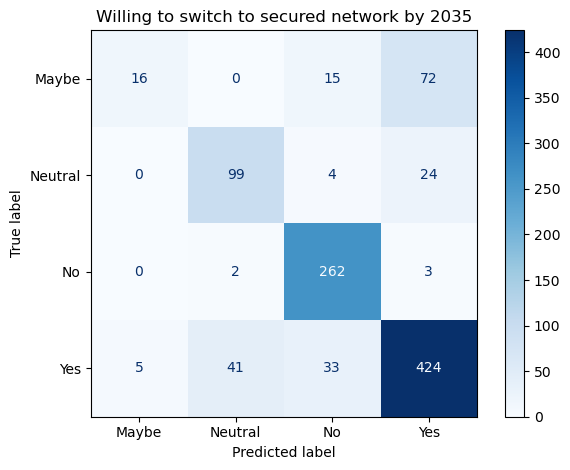

In [14]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Create a logistic regression model
model = LogisticRegression(max_iter=200)
# Train the model
model.fit(x_train, y_train)
# Make predictions
y_pred = model.predict(x_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


from sklearn.metrics import classification_report
# See classification Report
print(classification_report(y_test,y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
# Set custom x and y tick labels
class_names = ['Maybe', 'Neutral', 'No', 'Yes']
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)
plt.title('Willing to switch to secured network by 2035')
save_fig("willing to switch_confusion_matrix", subfolder="11.9")
plt.show()

### Feature: Gender

In [15]:
# Split dataset
from sklearn.model_selection import train_test_split

y = df['willing_to_switch_to_secured_netw_2035']
x = df[['gender']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 1)
(4000,)
(1000, 1)
(1000,)


Accuracy: 50.30%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.00      0.00      0.00       127
           2       0.00      0.00      0.00       267
           3       0.50      1.00      0.67       503

    accuracy                           0.50      1000
   macro avg       0.13      0.25      0.17      1000
weighted avg       0.25      0.50      0.34      1000



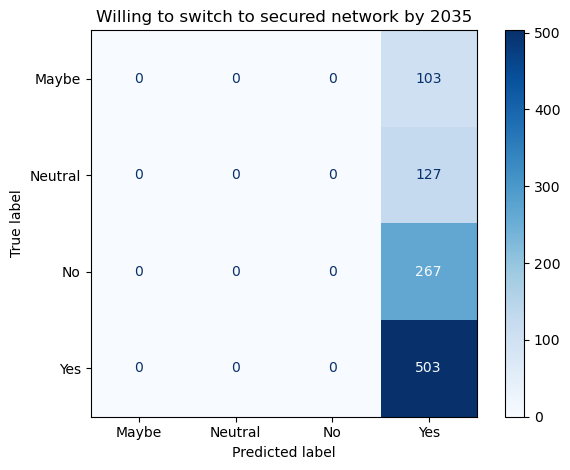

In [16]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Create a logistic regression model
model = LogisticRegression(max_iter=200)
# Train the model
model.fit(x_train, y_train)
# Make predictions
y_pred = model.predict(x_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


from sklearn.metrics import classification_report
# See classification Report
print(classification_report(y_test,y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
# Set custom x and y tick labels
class_names = ['Maybe', 'Neutral', 'No', 'Yes']
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)
plt.title('Willing to switch to secured network by 2035')
save_fig("gender_confusion_matrix", subfolder="11.9")
plt.show()

### Feature: Age

In [17]:
# Split dataset
from sklearn.model_selection import train_test_split

y = df['willing_to_switch_to_secured_netw_2035']
x = df[['age']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 1)
(4000,)
(1000, 1)
(1000,)


Accuracy: 58.50%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.00      0.00      0.00       127
           2       0.87      0.36      0.51       267
           3       0.55      0.97      0.70       503

    accuracy                           0.58      1000
   macro avg       0.35      0.33      0.30      1000
weighted avg       0.51      0.58      0.49      1000



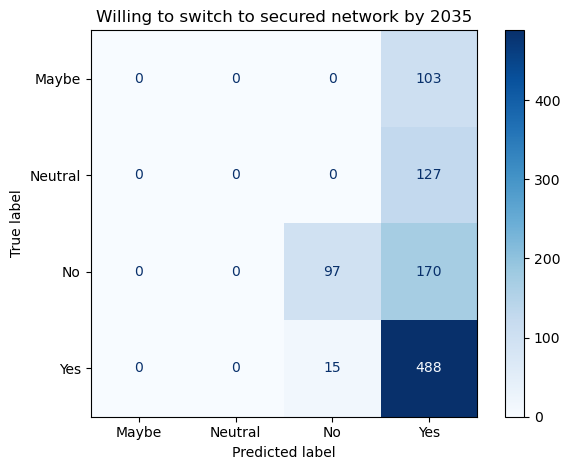

In [18]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Create a logistic regression model
model = LogisticRegression(max_iter=200)
# Train the model
model.fit(x_train, y_train)
# Make predictions
y_pred = model.predict(x_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


from sklearn.metrics import classification_report
# See classification Report
print(classification_report(y_test,y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
# Set custom x and y tick labels
class_names = ['Maybe', 'Neutral', 'No', 'Yes']
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)
plt.title('Willing to switch to secured network by 2035')
save_fig("age_confusion_matrix", subfolder="11.9")
plt.show()

### Feature: Profession

In [19]:
# Split dataset
from sklearn.model_selection import train_test_split

y = df['willing_to_switch_to_secured_netw_2035']
x = df[['profession']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 1)
(4000,)
(1000, 1)
(1000,)


Accuracy: 57.60%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.00      0.00      0.00       127
           2       0.53      0.98      0.69       267
           3       0.65      0.62      0.64       503

    accuracy                           0.58      1000
   macro avg       0.29      0.40      0.33      1000
weighted avg       0.47      0.58      0.50      1000



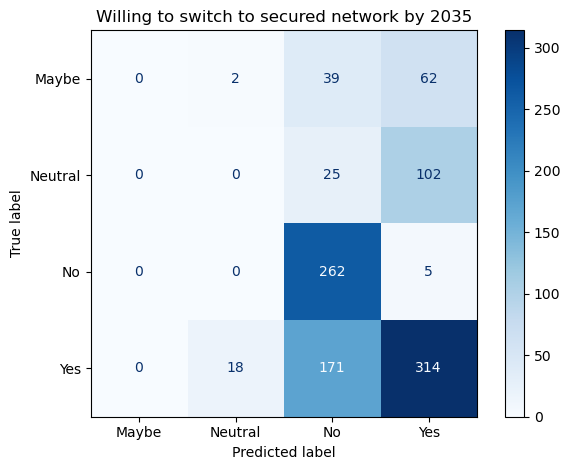

In [20]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Create a logistic regression model
model = LogisticRegression(max_iter=200)
# Train the model
model.fit(x_train, y_train)
# Make predictions
y_pred = model.predict(x_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


from sklearn.metrics import classification_report
# See classification Report
print(classification_report(y_test,y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
# Set custom x and y tick labels
class_names = ['Maybe', 'Neutral', 'No', 'Yes']
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)
plt.title('Willing to switch to secured network by 2035')
save_fig("profession_confusion_matrix", subfolder="11.9")
plt.show()

### Feature: Country

In [21]:
# Split dataset
from sklearn.model_selection import train_test_split

y = df['willing_to_switch_to_secured_netw_2035']
x = df[['country']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 1)
(4000,)
(1000, 1)
(1000,)


Accuracy: 50.30%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.00      0.00      0.00       127
           2       0.00      0.00      0.00       267
           3       0.50      1.00      0.67       503

    accuracy                           0.50      1000
   macro avg       0.13      0.25      0.17      1000
weighted avg       0.25      0.50      0.34      1000



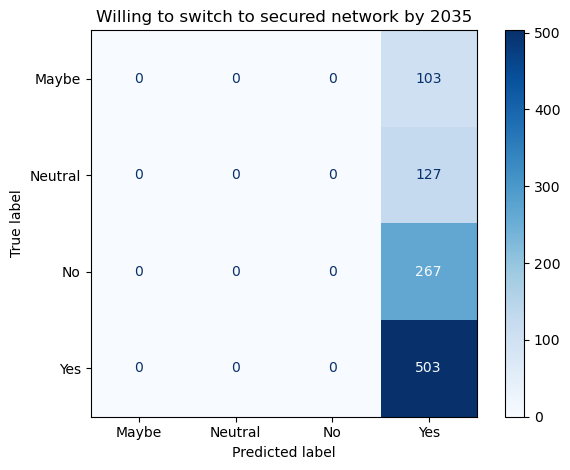

In [22]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Create a logistic regression model
model = LogisticRegression(max_iter=200)
# Train the model
model.fit(x_train, y_train)
# Make predictions
y_pred = model.predict(x_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


from sklearn.metrics import classification_report
# See classification Report
print(classification_report(y_test,y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
# Set custom x and y tick labels
class_names = ['Maybe', 'Neutral', 'No', 'Yes']
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)
plt.title('Willing to switch to secured network by 2035')
save_fig("country_confusion_matrix", subfolder="11.9")
plt.show()

## 11.11. Are you happy to provide us your email address for further updates? (Col Q)

Find the ratio with graphical visualisation based on Gender, Age, Profession & Country.

Use GBM here because we need a sequence that combines users' future attachment with us that shows hidden fascination on our task Thus we make a final prediction with high predictive accuracy and that can be used for both classification and regression tasks.

In [23]:
# Split dataset
from sklearn.model_selection import train_test_split

y = df['happy_to_provide_emails']
x = df[['age','gender','profession','country']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 4)
(4000,)
(1000, 4)
(1000,)


Accuracy: 88.30%
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       671
           1       0.89      0.74      0.81       329

    accuracy                           0.88      1000
   macro avg       0.88      0.85      0.86      1000
weighted avg       0.88      0.88      0.88      1000



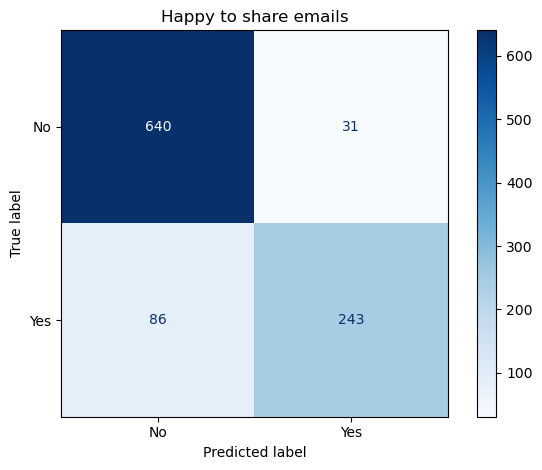

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

# See classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
# Set custom x and y tick labels
class_names = ['No', 'Yes']
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)
plt.title('Happy to share emails')
save_fig("cconfusion_matrix", subfolder="11.11")
plt.show()

## Final Task

### Feature: Gender

In [26]:
# Split dataset
from sklearn.model_selection import train_test_split

y = df['gender']
x = df.drop(columns='gender')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 14)
(4000,)
(1000, 14)
(1000,)


Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       316
           1       1.00      1.00      1.00        98
           2       1.00      1.00      1.00       586

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



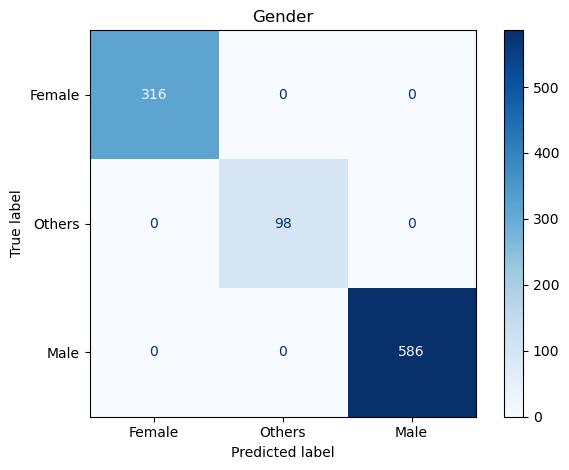

In [27]:
# DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Create a logistic regression model
model = DecisionTreeClassifier(random_state=42)
# Train the model
model.fit(x_train, y_train)
# Make predictions
y_pred = model.predict(x_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


from sklearn.metrics import classification_report
# See classification Report
print(classification_report(y_test,y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
# Set custom x and y tick labels
class_names = ['Female', 'Others', 'Male']
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)
plt.title('Gender')
save_fig("gender_confusion_matrix", subfolder="Final Task")
plt.show()

### Feature: Age

In [28]:
# Split dataset
from sklearn.model_selection import train_test_split

y = df['age']
x = df.drop(columns='age')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 14)
(4000,)
(1000, 14)
(1000,)


Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       545
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        95

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



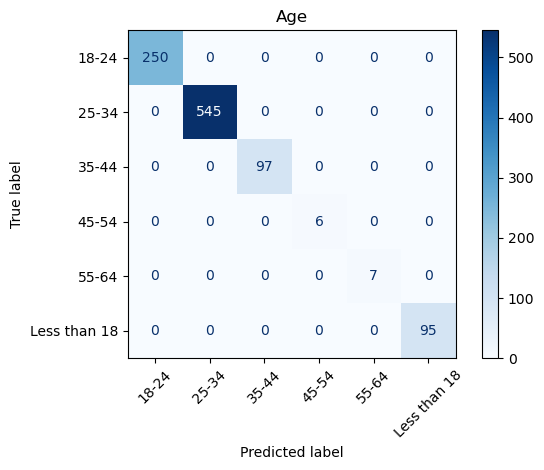

In [31]:
# DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Create a logistic regression model
model = DecisionTreeClassifier(random_state=42)
# Train the model
model.fit(x_train, y_train)
# Make predictions
y_pred = model.predict(x_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


from sklearn.metrics import classification_report
# See classification Report
print(classification_report(y_test,y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
# Set custom x and y tick labels
class_names = ['18-24', '25-34', '35-44', '45-54', '55-64', 'Less than 18']
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.title('Age')
save_fig("age_confusion_matrix", subfolder="Final Task")
plt.show()

### Feature: Country

In [32]:
# Split dataset
from sklearn.model_selection import train_test_split

y = df['country']
x = df.drop(columns='country')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 14)
(4000,)
(1000, 14)
(1000,)


Accuracy: 99.80%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.99      0.99       197
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00       641
           9       1.00      1.00      1.00       122

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



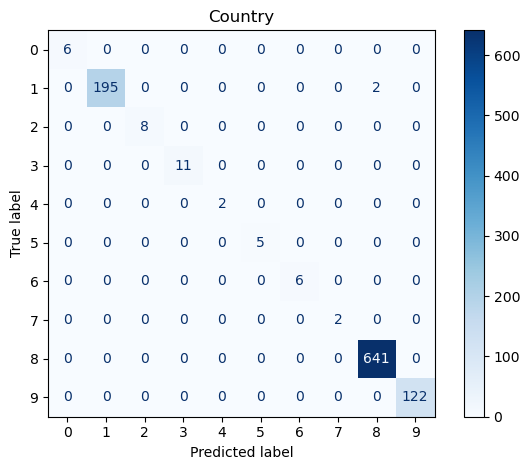

In [34]:
# DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Create a logistic regression model
model = DecisionTreeClassifier(random_state=42)
# Train the model
model.fit(x_train, y_train)
# Make predictions
y_pred = model.predict(x_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


from sklearn.metrics import classification_report
# See classification Report
print(classification_report(y_test,y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Country')
save_fig("country_confusion_matrix", subfolder="Final Task")
plt.show()

### Feature: Profession

In [35]:
# Split dataset
from sklearn.model_selection import train_test_split

y = df['profession']
x = df.drop(columns='profession')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 14)
(4000,)
(1000, 14)
(1000,)


Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00       135
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00       121
          10       1.00      1.00      1.00       480
          11       1.00      1.00      1.00        26

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



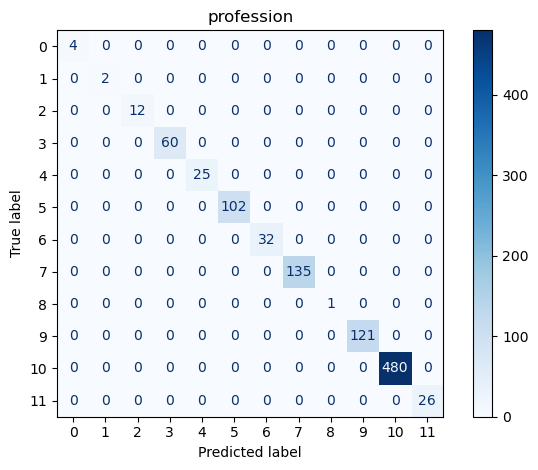

In [36]:
# DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Create a logistic regression model
model = DecisionTreeClassifier(random_state=42)
# Train the model
model.fit(x_train, y_train)
# Make predictions
y_pred = model.predict(x_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


from sklearn.metrics import classification_report
# See classification Report
print(classification_report(y_test,y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('profession')
save_fig("profession_confusion_matrix", subfolder="Final Task")
plt.show()